In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point, Polygon
import descartes
#conda install -c conda-forge/label/cf201901 folium
import folium
%matplotlib inline

In [2]:
#import sys
#!conda install --yes --prefix {sys.prefix} descartes

In [3]:
ukCrimeData = pd.read_csv('stop_and_search.csv')
#ukCrimeData

,Type,Date,Latitude,Longitude,Gender,Age range,Self-defined ethnicity,Officer-defined ethnicity,Legislation,Object of search,Outcome,Removal of more than just outer clothing
0,Person and Vehicle search,2020-01-01 00:00:00+00:00,50.964989,-0.152435,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),NaN,A no further action disposal,False
1,Person and Vehicle search,2020-01-01 00:00:00+00:00,50.964989,-0.152435,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),NaN,Arrest,False
2,Person search,2020-01-01 00:00:00+00:00,50.834061,-0.207628,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),NaN,A no further action disposal,False
3,Person search,2020-01-01 00:00:00+00:00,50.855733,0.578882,Male,NaN,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),NaN,A no further action disposal,False
4,Person search,2020-01-01 00:00:00+00:00,50.855733,0.578882,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),NaN,A no further action disposal,False
...,...,...,...,...,...,...,...,...,...,...,...,...
1161745,Person search,2018-12-31 10:14:21.317000+00:00,54.644229,-3.546007,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,False
1161746,Person search,2018-12-31 10:21:36.497000+00:00,54.644229,-3.546007,Male,over 34,White - English/Welsh/Scottish/Northern Irish/...,White,Police and Criminal Evidence Act 1984 (section 1),Stolen goods,A no further action disposal,False
1161747,Person search,2018-12-31 14:18:37.087000+00:00,NaN,NaN,Male,25-34,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False
1161748,Person and Vehicle search,2018-12-31 15:25:42.790000+00:00,54.661553,-3.417845,Male,18-24,White - English/Welsh/Scottish/Northern Irish/...,White,Misuse of Drugs Act 1971 (section 23),Controlled drugs,A no further action disposal,False


In [4]:
#sepreating the cordinates and the objects from the rest of the data
cordinates = ukCrimeData[['Latitude', 'Longitude','Object of search']]
#drops cordinates with NA
cordinates = cordinates.loc[cordinates['Object of search'] == 'Stolen goods']
cordinates = cordinates.dropna()
#cordinates

,Latitude,Longitude,Object of search
43,50.825977,-0.133151,Stolen goods
79,50.855733,0.578882,Stolen goods
107,51.157146,-0.162188,Stolen goods
128,50.837172,-0.138073,Stolen goods
164,50.830855,-0.780005,Stolen goods
...,...,...,...
1161702,54.547674,-3.585504,Stolen goods
1161703,54.547674,-3.585504,Stolen goods
1161738,52.782357,-0.963639,Stolen goods
1161745,54.644229,-3.546007,Stolen goods


In [5]:
##need to make a map from the longitude and latitude
street_map = gpd.read_file('Uk_poly.shp')
#street_map

In [6]:
#fig,ax = plt.subplots()
#street_map.plot(ax = ax)

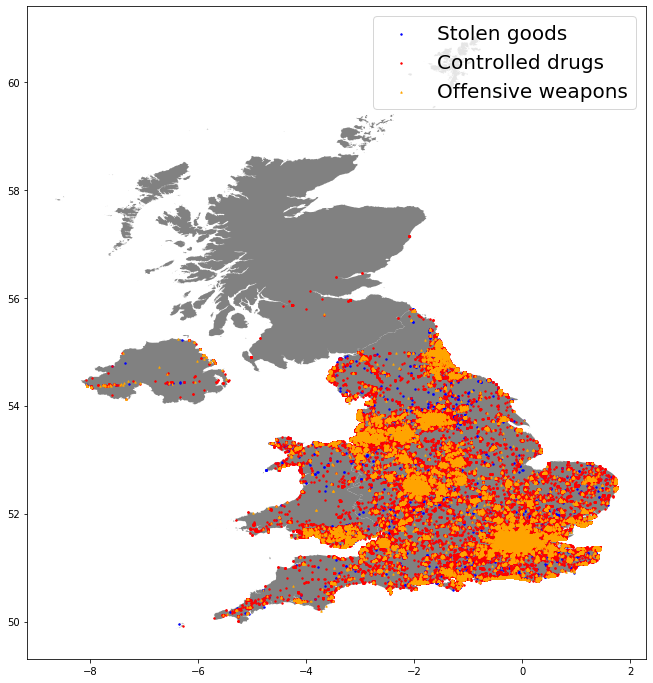

In [108]:
crs = {'init':'espc:4326'}

geometry = [Point(xy) for xy in zip(ukCrimeData['Longitude'], ukCrimeData['Latitude'])]

geo_df = gpd.GeoDataFrame(ukCrimeData, crs = crs, geometry = geometry)



fig,ax = plt.subplots(figsize = (15,12))
street_map.plot(ax = ax, alpha = 4.0, color = "grey")
geo_df[geo_df['Object of search'] == 'Stolen goods'].plot(ax = ax, markersize = 2, color = "blue", marker = "o", label = "Stolen goods")
geo_df[geo_df['Object of search'] == 'Controlled drugs'].plot(ax = ax, markersize = 2, color = "red", marker = "o", label = "Controlled drugs")
geo_df[geo_df['Object of search'] == 'Offensive weapons'].plot(ax = ax, markersize = 2, color = "orange", marker = "^", label = "Offensive weapons")
plt.legend(prop={'size': 20})

# add title to graph
#plt.title(‘some name’, fontsize=15,fontweight=’bold’)
#plt.show()

this map showsand compares the cases ploted for stolen goods, controlled drugs, and offensive weapons throughout the UK and can see drugs are more common throughout the UK but most cases are centered around the major Citities such as London

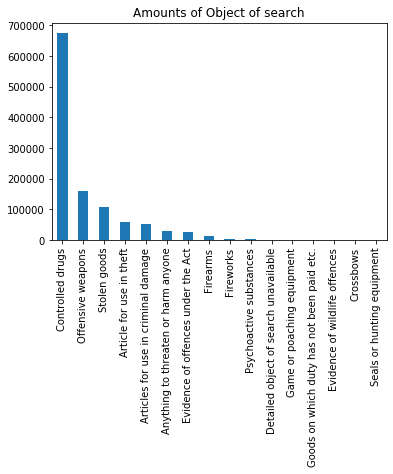

In [8]:
#need to get the top 'Object of search' and also compare the 'Removal of more than just outer clothing'
ukCrimeData['Object of search'].value_counts().plot(kind = 'bar', title = 'Amounts of Object of search')

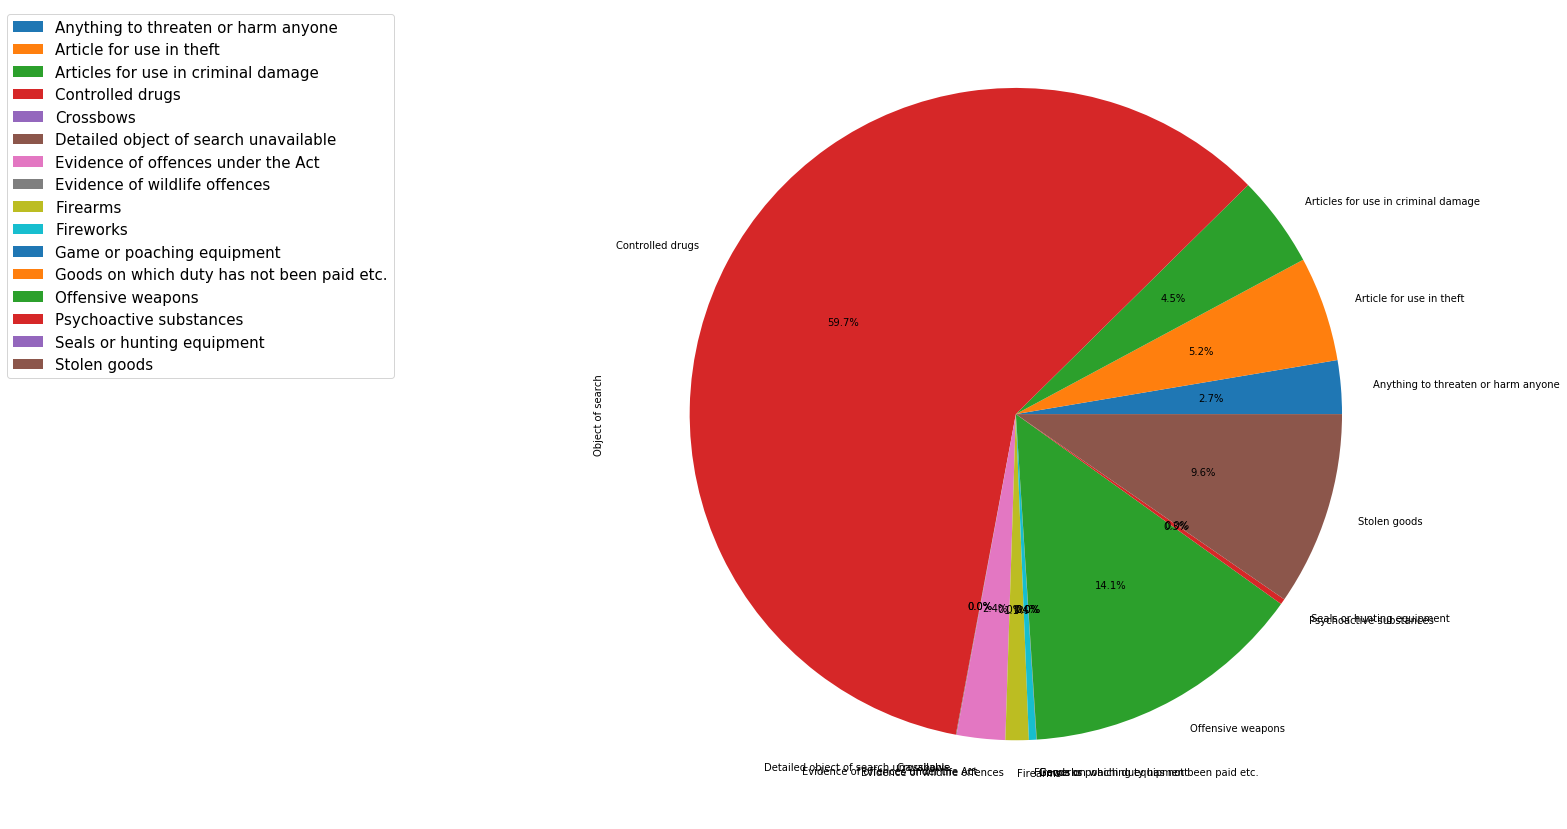

In [104]:
#percentage of objects
objectsserach = ukCrimeData[['Object of search']]
objectsserach = objectsserach.dropna()

osCounts  = objectsserach.groupby('Object of search')['Object of search'].count()
#osCounts

plot1 = osCounts.plot.pie(y='', figsize=(20, 15),autopct='%1.1f%%')
plot1.legend(loc="upper center",bbox_to_anchor=(-0.5, 1.),fontsize=15)
#plot

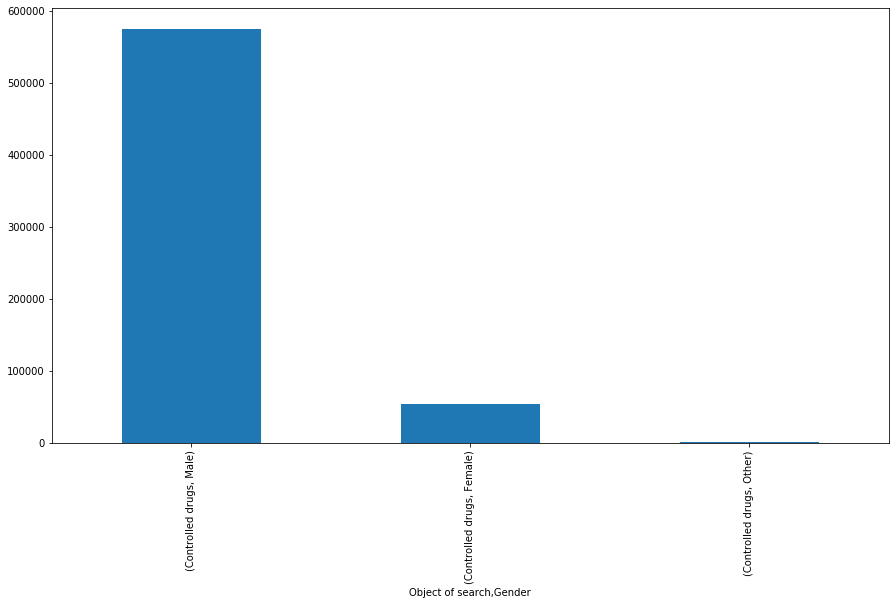

In [115]:
#sepreating the Gender and the objects from the rest of the data
drugGender = ukCrimeData[['Gender','Object of search']]
drugGender = drugGender.loc[drugGender['Object of search'] == 'Controlled drugs']
drugGender = drugGender.dropna()
#drugGender

drugGender.groupby('Object of search')['Gender'].value_counts().plot(x = 'Object of search', y= 'Gender', kind = 'bar',figsize =(15,8))

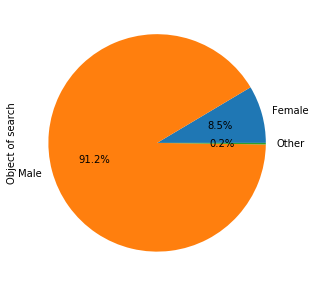

In [36]:
#pie chart percentage showing which gender has possesion of drugs
genderCounts  = drugGender.groupby('Gender')['Object of search'].count()
genderCounts[0:2]
plot2 = genderCounts.plot.pie(y='', figsize=(5, 5),autopct='%1.1f%%')
plot2

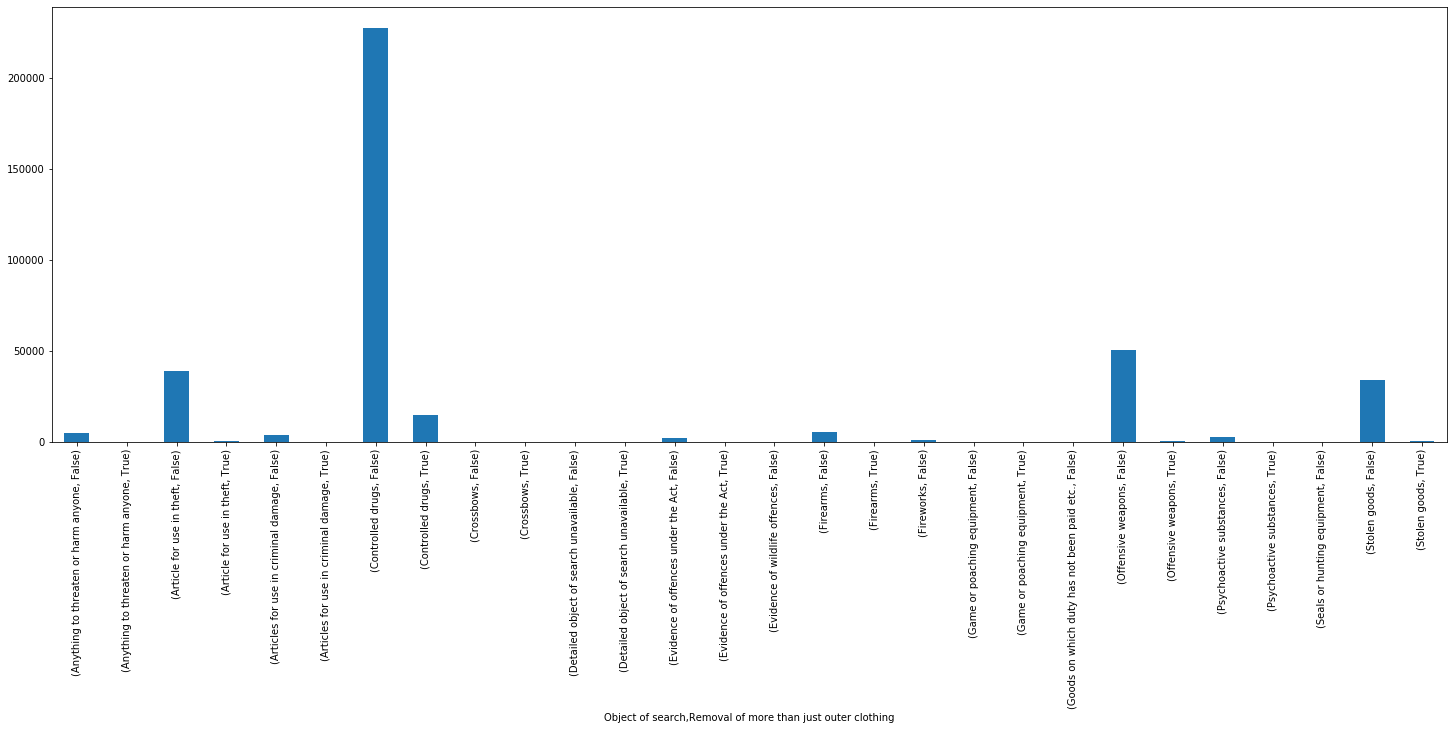

In [116]:
ukCrimeData.groupby('Object of search')['Removal of more than just outer clothing'].value_counts().plot(x = 'Object of search', y= 'Removal of more than just outer clothing', kind = 'bar',figsize =(25,8))

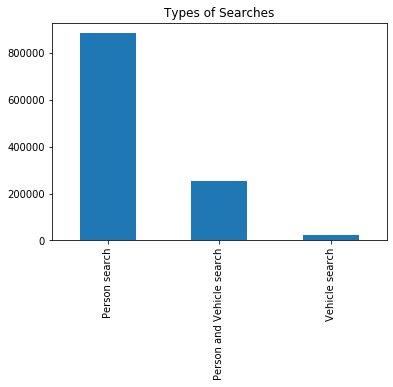

In [10]:
ukCrimeData['Type'].value_counts().plot(kind = 'bar', title = 'Types of Searches')

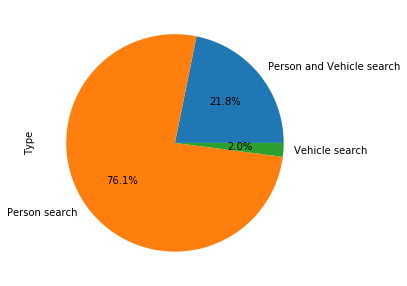

In [41]:
#percentage of Types of crime
search = ukCrimeData[['Type']]
#searchType = searchType.loc[searchType['Object of search'] == 'Controlled drugs']
search = search.dropna()

searchCounts  = search.groupby('Type')['Type'].count()
#searchCounts

plot3 = searchCounts.plot.pie(y='', figsize=(5, 5),autopct='%1.1f%%')
plot3

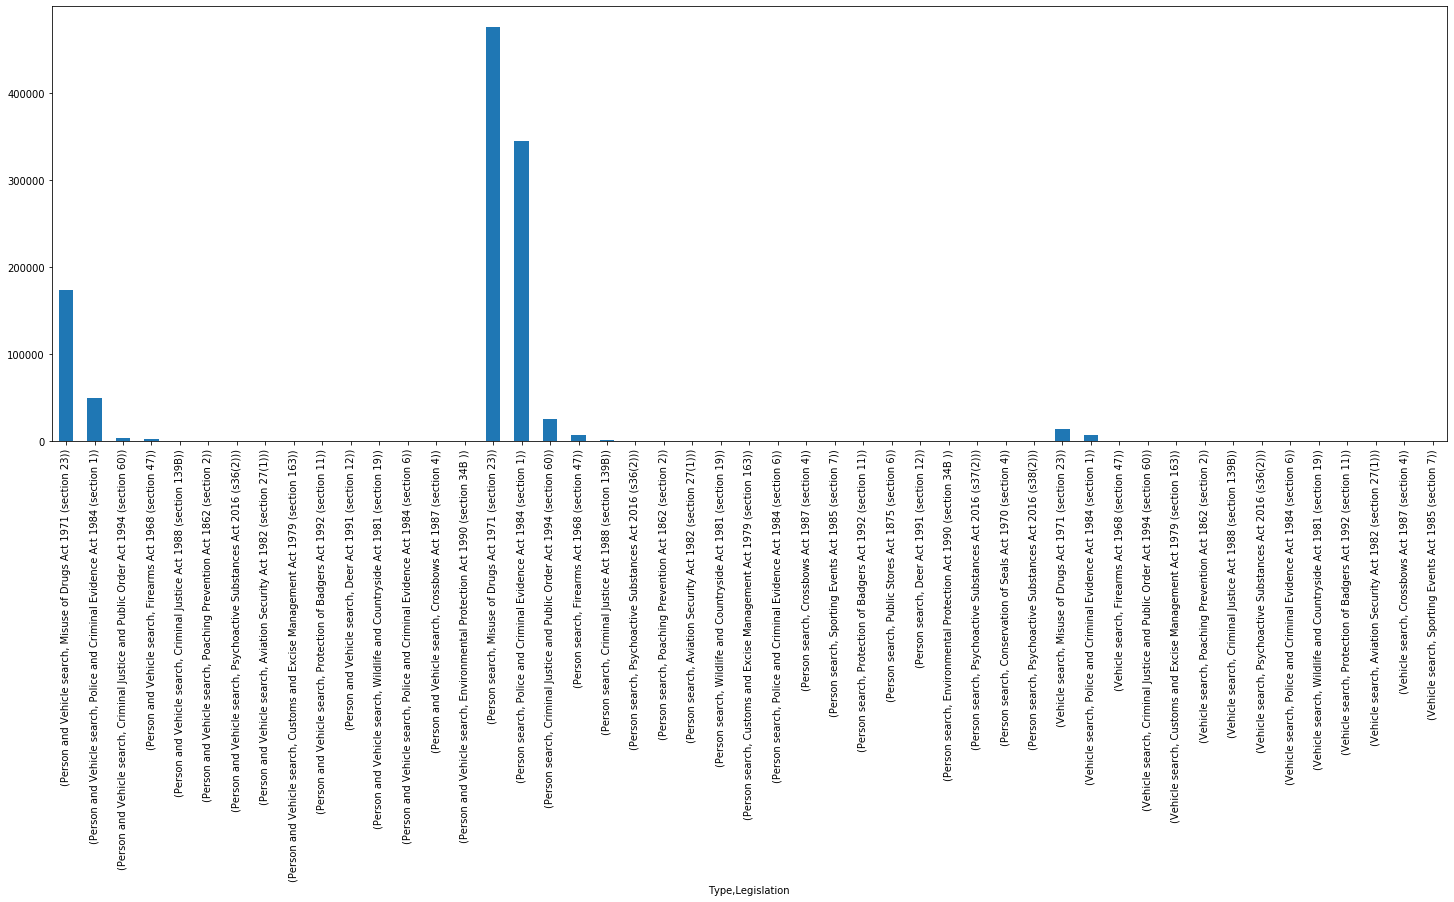

In [117]:
#types of searches and the Legistration used based off the type of search
ukCrimeData.groupby('Type')['Legislation'].value_counts().plot(x = 'Type', y= 'Legislation', kind = 'bar',figsize =(25,8))

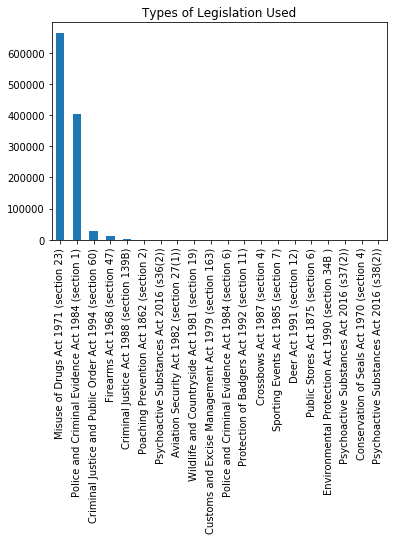

In [12]:
#the total amounts of Legistrations
ukCrimeData['Legislation'].value_counts().plot(kind = 'bar', title = 'Types of Legislation Used')

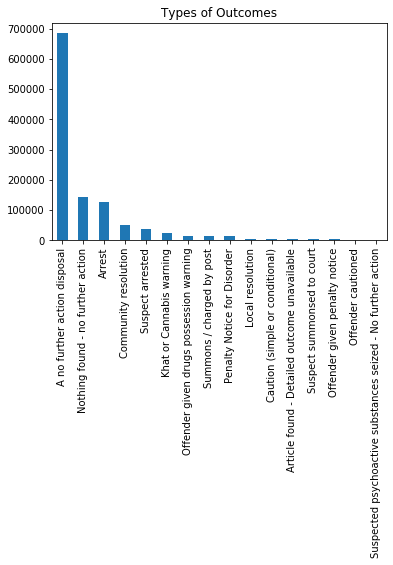

In [13]:
ukCrimeData['Outcome'].value_counts().plot(kind = 'bar', title = 'Types of Outcomes')

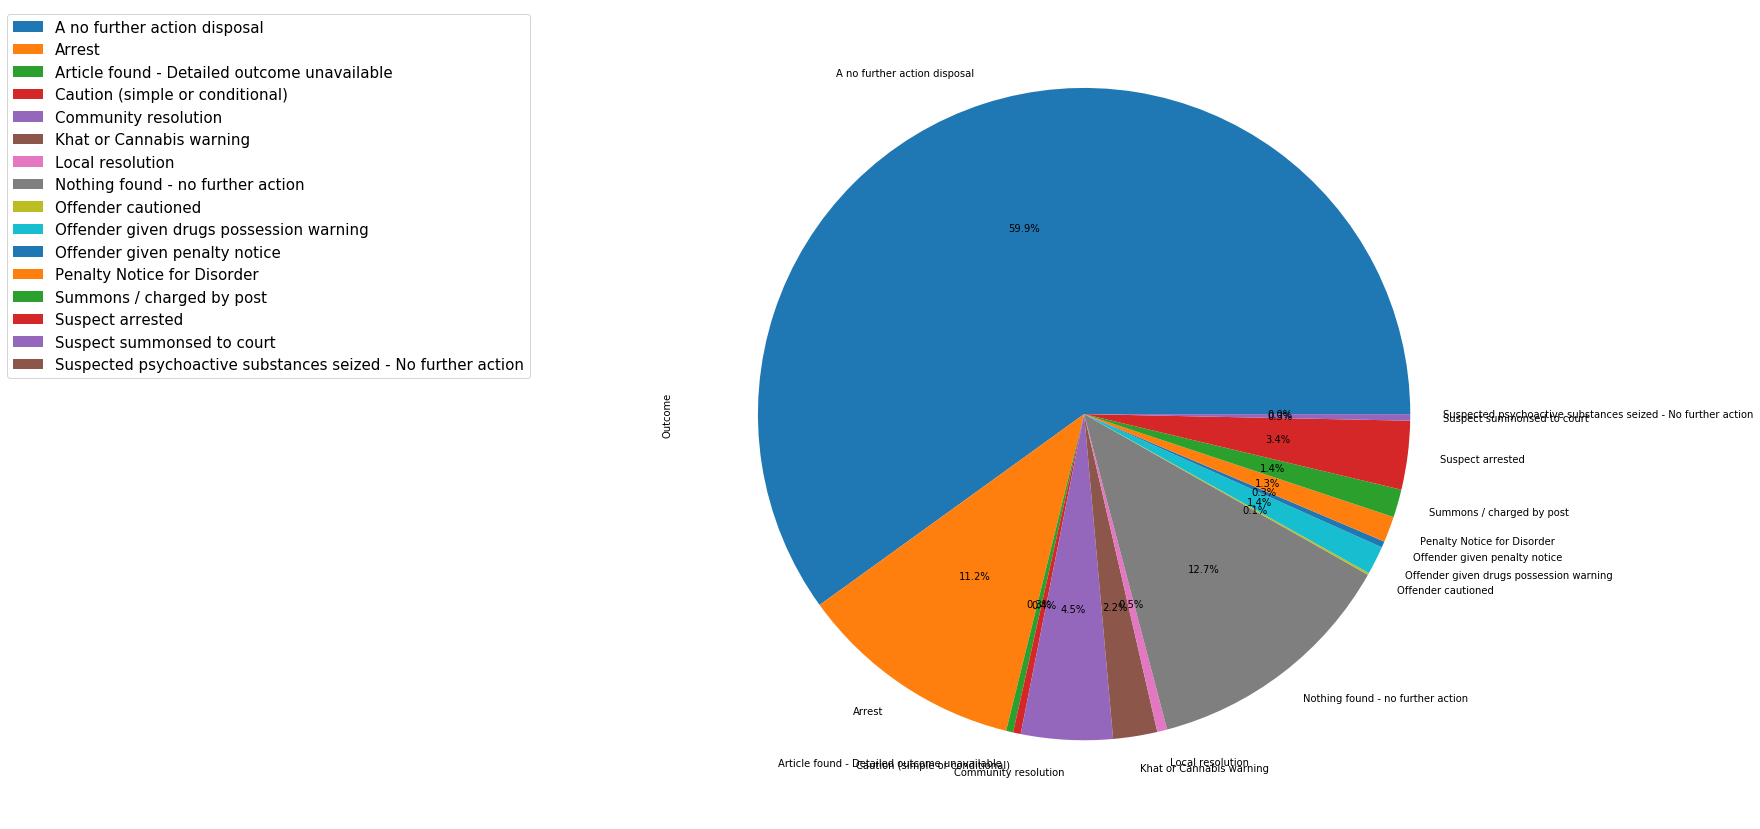

In [106]:
#percentage of outcomes
outcomes = ukCrimeData[['Outcome']]
outcomes = outcomes.dropna()

outcomesCounts  = outcomes.groupby('Outcome')['Outcome'].count()
#outcomesCounts

plot4 = outcomesCounts.plot.pie(y='', figsize=(20, 15),autopct='%1.1f%%')
plot4.legend(loc="upper center",bbox_to_anchor=(-0.5, 1.),fontsize=15)
plot4

In [14]:
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
m = folium.Map(location = [55.378052,-3.435973], zoom_start = 6)

#mc = MarkerCluster()

#for i in range(0,len(cordinates)):
#    folium.Marker([cordinates.iloc[i]['Latitude'], cordinates.iloc[i]['Longitude']]).add_child(mc)

#m.add_child(mc)
#display(m)



#for lat,lon,name in zip(cordinates['Latitude'],cordinates['Longitude'],cordinates['Object of search']):
#    mc.add_child(folium.Marker(location=[lat,lon],popup=(folium.Popup(name))))

#m.add_child(mc)
#m

#for row in cordinates.itertuples():
#    m.add_child(folium.Marker(location=[row.Latitude,row.Longitude]))
#m

In [15]:
#marker_cluster = MarkerCluster().add_to(m)
#mc = MarkerCluster()
#for i in range(0,len(cordinates)):
#    mc.add_child(folium.Marker([cordinates.iloc[i]['Longitude'], cordinates.iloc[i]['Latitude']], popup=cordinates.iloc[i]['Object of search']).add_to(marker_cluster))

#m.add_child(mc)
#m